# Netflix EDA and Recommendation 

The goal of this exercise is to explore a Netflix dataset and gain some insights by slicing the data. We also want to be able to merge it with other datasets like IMDb movies and ratings to append valuable information to our existing dataset. Using the combined dataset, we would like to build a recommender system for the user.

First we start with some exploratory data analysis of the data and summarize the data we are working and possible inferences we can draw from it.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import os
import warnings
warnings.filterwarnings("ignore")

wd="C:/Users/Abhinav/LivePerson Project/Submission/"
os.chdir(wd)


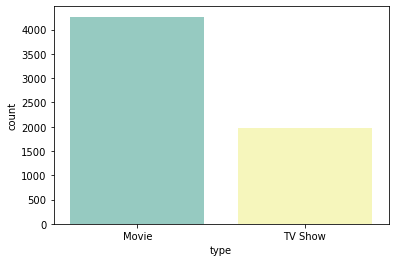

In [8]:
netflix_data=pd.read_csv("netflix_titles.csv")
netflix_data.head()
netflix_data.shape

netflix_data['type'].value_counts()

sns.countplot(x="type", data=netflix_data, palette="Set3")


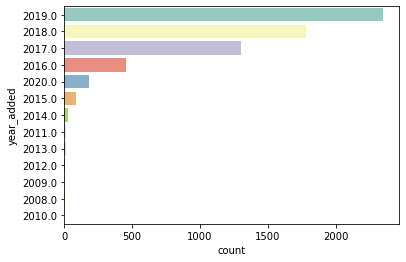

In [10]:
netflix_data['year_added'] = pd.DatetimeIndex(netflix_data['date_added']).year

sns.countplot(y="year_added", data=netflix_data, palette="Set3", order=netflix_data['year_added'].value_counts().index[0:100])

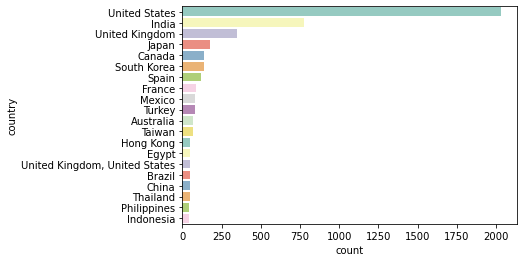

In [11]:
sns.countplot(y="country", data=netflix_data, palette="Set3", order=netflix_data['country'].value_counts().index[0:20])


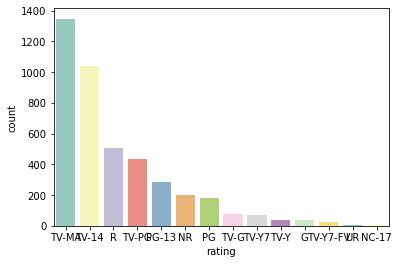

In [12]:
netflix_movies=netflix_data[netflix_data['type']=='Movie']

sns.countplot(x="rating", data=netflix_movies, palette="Set3", order=netflix_movies['rating'].value_counts().index[0:100])


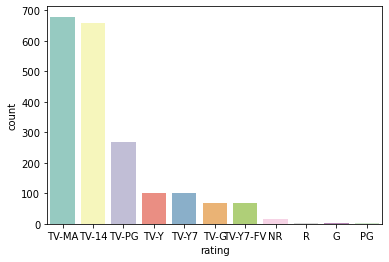

In [39]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']


sns.countplot(x="rating", data=netflix_shows, palette="Set3", order=netflix_shows['rating'].value_counts().index[0:100])



Observations about the data we are working with:

1.There dataset consists of two types of data Movies and TV shows. We have a larger dataset of movies than Shows.

2.The dataset consists of movies and shows added in the last 5-6 years 

3.Most of the content created in this dataset from US, followed by India and UK

4.Most of the movies and TV shows are rated TV-MA. The ratings are given by Movie Picture Association. TV-MA: means that program is intended to be viewed by mature adult audiences and may be unsuitable for children under 17. The second most common rating is TV-14. TV-14 rating means parents strongly cautioned. The programs contains some material that many parents would find unsuitable for children under 14 years of age. Interesting point to note there are a lot more Rated R movies than shows. Rating R means disturbing violent content and bloody images throughout, pervasive language. As such recommender will be more useful for adults watching Netflix more than children.


## Merging the IMBb movies dataset with the Netflix dataset

Using the IMBb datasets movies and ratings, we get add relevant columns like genre, writer, weighted_average_vote and more to the original dataset. Genre and writer columns along with cast, director will be used later in our recommender to suggest similar movies and shows to the user.

In [33]:
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['imdb_title_id','title','year','genre','writer'])
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['imdb_title_id','weighted_average_vote','us_voters_rating','non_us_voters_rating'])

imdb_merge=imdb_titles.merge(imdb_ratings,left_on='imdb_title_id',right_on='imdb_title_id',how='inner')

imdb_merge.shape




(85855, 8)

RangeIndex(start=0, stop=1798, step=1)


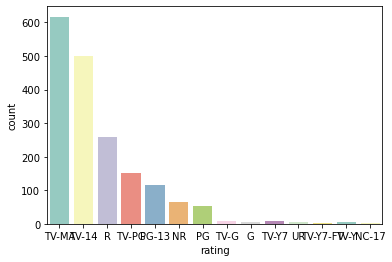

In [38]:
netflix_all=netflix_data.merge(imdb_merge,left_on='title',right_on='title',how='inner')

#cleaning
netflix_all.drop_duplicates(subset=['title'], inplace=True)

#reset index to 0:len(netflix_all)
netflix_all.reset_index(drop=True, inplace=True)

print(netflix_all.index)

netflix_movies=netflix_all[netflix_all['type']=='Movie']
netflix_shows=netflix_all[netflix_all['type']=='TV Show']

netflix_all.shape

sns.countplot(x="rating", data=netflix_all, palette="Set3", order=netflix_movies['rating'].value_counts().index[0:100])




The merged dataset has a similar rating distribution. 

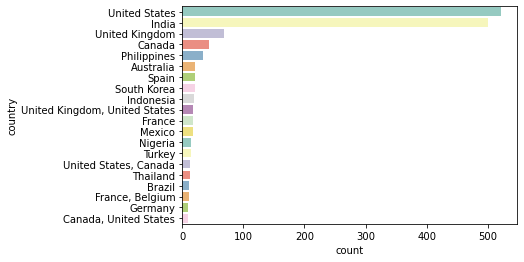

In [18]:
# By country analysis
sns.countplot(y="country", data=netflix_all, palette="Set3", order=netflix_all['country'].value_counts().index[0:20])

#sns.countplot(y="country", data=netflix_movies, palette="Set3", order=netflix_movies['country'].value_counts().index[0:15])
#sns.countplot(y="country", data=netflix_shows, palette="Set3", order=netflix_shows['country'].value_counts().index[0:15])

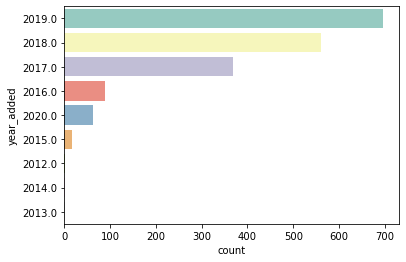

In [19]:
# By year added to netflix
sns.countplot(y="year_added", data=netflix_all, palette="Set3", order=netflix_all['year_added'].value_counts().index[0:100])

#netflix_movies.head()
#sns.countplot(y="year_added", data=netflix_movies, palette="Set3", order=netflix_movies['year_added'].value_counts().index[0:100])
#sns.countplot(y="year_added", data=netflix_shows, palette="Set3", order=netflix_shows['year_added'].value_counts().index[0:100])

In [11]:
# Trending or most voted movies and shows to be displayed to the user
ranked_data=netflix_all.sort_values(by='weighted_average_vote', ascending=False)
ranked_data

ranked_data[['title','type','duration','cast','director','genre','description']][0:10]



,title,type,duration,cast,director,genre,description
1136,Pulp Fiction,Movie,154 min,"John Travolta, Samuel L. Jackson, Uma Thurman,...",Quentin Tarantino,"Crime, Drama",This stylized crime caper weaves together stor...
1731,Schindler's List,Movie,195 min,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",Steven Spielberg,"Biography, Drama, History",Oskar Schindler becomes an unlikely humanitari...
1096,Inception,Movie,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Christopher Nolan,"Action, Adventure, Sci-Fi","In this mind-bending sci-fi thriller, a man ru..."
1475,Eh Janam Tumhare Lekhe,Movie,124 min,"Pavan Malhotra, Sudhanshu Aggarwal, Arjuna Bha...",Harjit Singh,Biography,Driven by the lessons he learned from his moth...
1317,Gol Maal,Movie,137 min,"Amol Palekar, Bindiya Goswami, Deven Verma, Ut...",Hrishikesh Mukherjee,"Comedy, Romance",When circumstances at work compel Ram to prete...
1329,Koshish,Movie,115 min,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",Gulzar,Drama,A speech and hearing-impaired couple persists ...
1084,City of God,Movie,130 min,"Alexandre Rodrigues, Leandro Firmino, Phellipe...","Fernando Meirelles, Katia Lund","Crime, Drama","Growing up in a Rio de Janeiro slum, Rocket is..."
301,Oththa Seruppu Size 7,Movie,103 min,Parthiban,Parthiban,Drama,"Taken into custody, a murder suspect's theatri..."
1132,Merku Thodarchi Malai,Movie,115 min,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",Lenin Bharathi,Drama,"In southern India, a laborer's dreams of ownin..."
380,American History X,Movie,119 min,"Edward Norton, Edward Furlong, Beverly D'Angel...",Tony Kaye,Drama,A neo-Nazi gets sent to prison for murder and ...


# Recommender system based on Director, Cast, Genre and Writer

In [41]:
netflix_all['director'] = netflix_all['director'].fillna(' ')
netflix_all['director'] = netflix_all['director'].astype(str)
netflix_all['cast'] = netflix_all['cast'].fillna(' ')
netflix_all['cast'] = netflix_all['cast'].astype(str)
netflix_all['genre'] = netflix_all['genre'].fillna(' ')
netflix_all['genre'] = netflix_all['genre'].astype(str)
netflix_all['writer'] = netflix_all['writer'].fillna(' ')
netflix_all['writer'] = netflix_all['writer'].astype(str)


netflix_all['recommender'] = netflix_all['director'] + ' ' + ' ' + netflix_all['cast'] + ' ' + netflix_all['genre']+ ' ' + netflix_all['writer']



In [43]:
cv = CountVectorizer()
count_mat = cv.fit_transform(netflix_all['recommender'])
cosine_sim = cosine_similarity(count_mat,count_mat)
print(cosine_sim)


[[1.         0.03126527 0.03175003 ... 0.04120428 0.05184758 0.13912167]
 [0.03126527 1.         0.03077287 ... 0.07987231 0.         0.08989331]
 [0.03175003 0.03077287 1.         ... 0.04055536 0.         0.        ]
 ...
 [0.04120428 0.07987231 0.04055536 ... 1.         0.         0.05923489]
 [0.05184758 0.         0.         ... 0.         1.         0.        ]
 [0.13912167 0.08989331 0.         ... 0.05923489 0.         1.        ]]


In [44]:
indices = pd.Series(netflix_all['title'])

def recommend_a_movie(name):
    movies=[]
    idx = indices[indices == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    recommended_list= sort_index.iloc[1:5]
    for i in recommended_list.index:
        movies.append(indices[i])
    return movies

recommend_a_movie('Love')



['Berlin, I Love You', 'Forget Me Not', 'Dare to Be Wild', 'Nila']

## Future Enhancements

There are a couple of potential enhancements that can be make in order to improve the recommender

1. The starting dataset can be enhanced to have movies and shows added before 2014 
2. Currently the merge with IMDb dataset is done using title only. We could enhance this by using other common fields and try to save some more data for the recommender to work with.
3. The recommender can be enhanced to use other fields to do the cosine similarity like description etc.
4. If we are able to get user level data we can also use an alternative approch like collaborative filtering for recommender and compare the two appoaches!
